## Bayesian Final Project

### Arti Patel, Sudeepti Surapaneni, Sania Rasheed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math
import pymc3 as pm
import arviz as az
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os
from sklearn.decomposition import PCA
#import nltk
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import scipy.stats as st

/opt/anaconda3/lib/python3.7/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
#os.chdir('C:/Users/Arti Patel/Desktop/bayesian_ml/final')
dfsub = pd.read_csv('dfsub.csv')

In [3]:
dfsub.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,...,neg,neu,pos,compound,pcp,pc_neg,pc_neu,pc_pos,pc_compund,elong
0,0,NC and NH.,Trumpbart,politics,2.0,-1.0,-1.0,2016-10,10/16/16 23:55,"Yeah, I get that argument. At this point, I'd ...",...,0.000,0.337,0.663,0.6037,"{'neg': 0.126, 'neu': 0.657, 'pos': 0.217, 'co...",0.126,0.657,0.217,0.2023,False
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4.0,-1.0,-1.0,2016-11,11/1/16 0:24,The blazers and Mavericks (The wests 5 and 6 s...,...,0.000,0.844,0.156,0.3400,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",0.095,0.905,0.000,-0.3412,False
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3.0,3.0,0.0,2016-09,9/22/16 21:45,They're favored to win.,...,0.000,1.000,0.000,0.0000,"{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'comp...",0.000,0.233,0.767,0.7650,False
3,0,"I don't pay attention to her, but as long as s...",only7inches,AskReddit,0.0,0.0,0.0,2016-09,9/2/16 10:35,do you find ariana grande sexy ?,...,0.000,0.868,0.132,0.2259,"{'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'comp...",0.000,0.595,0.405,0.5267,False
4,0,Trick or treating in general is just weird...,only7inches,AskReddit,1.0,-1.0,-1.0,2016-10,10/23/16 21:43,What's your weird or unsettling Trick or Treat...,...,0.146,0.854,0.000,-0.0516,"{'neg': 0.25, 'neu': 0.517, 'pos': 0.233, 'com...",0.250,0.517,0.233,0.2023,False


In [4]:
dfsub.dtypes

label                     int64
comment                  object
author                   object
subreddit                object
score                   float64
ups                     float64
downs                   float64
date                     object
created_utc              object
parent_comment           object
comment_count             int64
parent_comment_count      int64
polarity                 object
neg                     float64
neu                     float64
pos                     float64
compound                float64
pcp                      object
pc_neg                  float64
pc_neu                  float64
pc_pos                  float64
pc_compund              float64
elong                      bool
dtype: object

In [5]:
dfsub.describe()

,label,score,ups,downs,comment_count,parent_comment_count,neg,neu,pos,compound,pc_neg,pc_neu,pc_pos,pc_compund
count,248862.000000,248862.000000,248862.000000,248862.000000,248862.000000,248862.000000,248862.000000,248862.000000,248862.000000,248862.000000,248862.000000,248862.000000,248862.000000,248862.000000
mean,0.522792,8.332289,6.748467,-0.139109,10.411650,22.857491,0.098893,0.765793,0.134362,0.045106,0.104583,0.787868,0.106991,-0.000886
std,0.499481,72.450290,62.870999,0.346061,9.389792,33.283854,0.171798,0.234200,0.192417,0.392443,0.146689,0.186856,0.144904,0.469366
min,0.000000,-186.000000,-172.000000,-1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.989500,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,1.000000,0.000000,0.000000,5.000000,8.000000,0.000000,0.612000,0.000000,-0.102700,0.000000,0.674000,0.000000,-0.340000
50%,1.000000,1.000000,1.000000,0.000000,9.000000,14.000000,0.000000,0.788000,0.000000,0.000000,0.000000,0.799000,0.043000,0.000000
75%,1.000000,3.000000,3.000000,0.000000,14.000000,26.000000,0.167000,1.000000,0.235000,0.340000,0.177000,1.000000,0.178000,0.361200
max,1.000000,9070.000000,5163.000000,0.000000,1818.000000,2751.000000,1.000000,1.000000,1.000000,0.999100,1.000000,1.000000,1.000000,0.999900


In [6]:
#convert boolean to numbers
dfsub['elong'] = np.where(dfsub['elong']>=True, 1, 0)

In [7]:
dfsub.columns
#dfsub.columns[18:22]

Index(['label', 'comment', 'author', 'subreddit', 'score', 'ups', 'downs',
       'date', 'created_utc', 'parent_comment', 'comment_count',
       'parent_comment_count', 'polarity', 'neg', 'neu', 'pos', 'compound',
       'pcp', 'pc_neg', 'pc_neu', 'pc_pos', 'pc_compund', 'elong'],
      dtype='object')

In [8]:
#standardize all features
for col in dfsub.columns[4:7]:
    mean = dfsub[col].mean()
    std = dfsub[col].std()
    dfsub[col] = ((dfsub[col] - mean)/std).values
for col in dfsub.columns[10:12]:
    mean = dfsub[col].mean()
    std = dfsub[col].std()
    dfsub[col] = ((dfsub[col] - mean)/std).values
for col in dfsub.columns[13:17]:
    mean = dfsub[col].mean()
    std = dfsub[col].std()
    dfsub[col] = ((dfsub[col] - mean)/std).values
for col in dfsub.columns[18:22]:
    mean = dfsub[col].mean()
    std = dfsub[col].std()
    dfsub[col] = ((dfsub[col] - mean)/std).values

In [9]:
dfsub.corr(method ='pearson')

,label,score,ups,downs,comment_count,parent_comment_count,neg,neu,pos,compound,pc_neg,pc_neu,pc_pos,pc_compund,elong
label,1.000000,-0.018016,-0.018037,0.041299,0.006826,0.015579,0.036602,-0.074813,0.062556,0.030019,0.048920,-0.031791,-0.005764,-0.043334,0.010705
score,-0.018016,1.000000,0.865087,-0.011392,0.006258,-0.001193,-0.000279,0.005938,-0.006701,-0.003971,0.000282,0.001325,-0.002005,-0.002371,-0.003083
ups,-0.018037,0.865087,1.000000,0.049542,0.005798,-0.001278,-0.001007,0.006654,-0.006943,-0.003947,-0.000253,0.001704,-0.001943,-0.001869,-0.002998
downs,0.041299,-0.011392,0.049542,1.000000,0.005526,0.012328,0.003357,-0.004569,0.002746,-0.001755,0.001905,0.000130,-0.002120,-0.003140,0.003062
comment_count,0.006826,0.006258,0.005798,0.005526,1.000000,0.087464,-0.002489,0.030620,-0.030763,0.010680,0.019382,-0.008360,-0.006205,-0.016185,-0.014098
parent_comment_count,0.015579,-0.001193,-0.001278,0.012328,0.087464,1.000000,0.005793,-0.014409,0.013989,0.005918,-0.006720,0.011653,-0.005842,0.009988,-0.001975
neg,0.036602,-0.000279,-0.001007,0.003357,-0.002489,0.005793,1.000000,-0.579649,-0.184470,-0.656963,0.092325,-0.062830,-0.011307,-0.071153,-0.016076
neu,-0.074813,0.005938,0.006654,-0.004569,0.030620,-0.014409,-0.579649,1.000000,-0.683433,-0.061817,-0.072608,0.093543,-0.041844,0.027432,0.023178
pos,0.062556,-0.006701,-0.006943,0.002746,-0.030763,0.013989,-0.184470,-0.683433,1.000000,0.662374,0.006657,-0.052053,0.062005,0.030341,-0.013334
compound,0.030019,-0.003971,-0.003947,-0.001755,0.010680,0.005918,-0.656963,-0.061817,0.662374,1.000000,-0.064630,0.010107,0.052962,0.084678,0.001351


In [10]:
#random split 75/25 train/test
X_train, X_test, y_train, y_test = train_test_split(dfsub.loc[:,['score','comment_count','parent_comment_count','neg','pc_neg','elong']], 
                                                    dfsub['label'], random_state=42)

In [11]:
#pca = PCA(.95)
pca = PCA(n_components=1)
#using 1 component since we want to plot, however ideally we want to keep number that retains most variability. 4 would be ideal here

In [12]:
#fit pca for training set X
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
#75/35 train test split

In [14]:
pca_xtrain = pca.transform(X_train)
pca_xtest = pca.transform(X_test)
loadings = pca.components_

In [15]:
#linear combinations of the features used
loadings

array([[-0.02869761,  0.04692183,  0.02370585,  0.70029371,  0.71133701,
        -0.00109269]])

In [16]:
print(pca.explained_variance_)

[1.08905319]


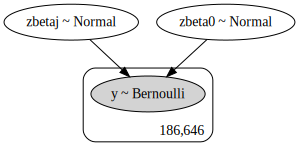

In [18]:
#logistic model with normal priors for both intercept and coefficient
with pm.Model() as logistic_model:
        beta0 = pm.Normal('zbeta0', mu=0, sd=2)
        betaj = pm.Normal('zbetaj', mu=0, sd=2)
        #beta_flat = pm.Beta('betaflat',alpha = 1, beta=1)
        mu =  pm.math.sigmoid(beta0 + pm.math.dot(betaj, pca_xtrain.T))
    
        outcome = pm.Bernoulli("y", mu, observed=y_train)
pm.model_to_graphviz(logistic_model)

In [ ]:
#variational fit, 50k iterations
SEED = 202
with logistic_model:
    approx = pm.fit(50000, method = 'advi', random_seed = SEED)

In [ ]:
#posterior densities for betas
pm.plot_posterior(approx.sample(1000))

In [28]:
s = approx.sample(1000)

In [29]:
#samples posterier predictive prob
ppc = pm.sample_posterior_predictive(s, model=logistic_model, samples=100)

100%|██████████| 100/100 [00:02<00:00, 35.49it/s]


In [53]:
#np.array(pca_xtest).shape

(62216, 1)

In [51]:
#np.array(ppc['y']).shape

(100, 1, 186646)

In [58]:
def invlogit(x):
    return np.exp(x) / (1 + np.exp(x))

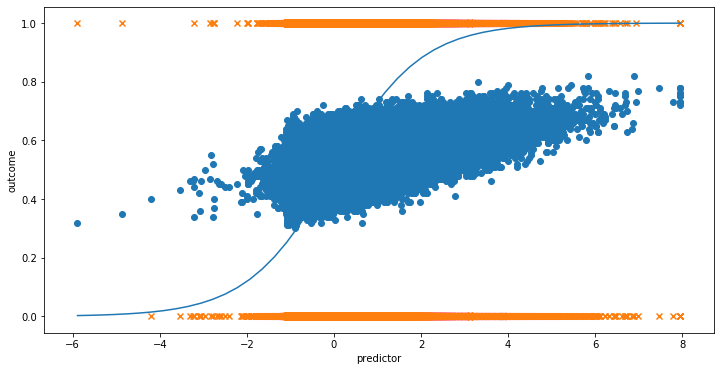

In [60]:
#plot of post prob and actual outcomes
_, ax = plt.subplots(figsize=(12, 6))

b = st.beta((ppc['y'] == 1).sum(axis=0), (ppc['y'] == 0).sum(axis=0))

# estimated probability
ax.scatter(x=pca_xtrain, y=b.mean())

# error bars on the estimate
plt.vlines(pca_xtrain, *b.interval(0.95))

# actual outcomes
ax.scatter(x=pca_xtrain,
           y=y_train, marker='x')

# True probabilities
x = np.linspace(pca_xtrain.min(), pca_xtrain.max())
ax.plot(x, invlogit(x), linestyle='-')


ax.set_xlabel('predictor')
ax.set_ylabel('outcome');

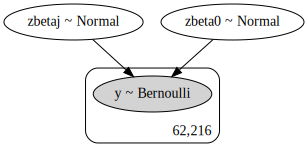

In [64]:
with pm.Model() as logistic_model_t:
        beta0 = pm.Normal('zbeta0', mu=0, sd=2)
        betaj = pm.Normal('zbetaj', mu=0, sd=2)
        #beta_flat = pm.Beta('betaflat',alpha = 1, beta=1)
        mu =  pm.math.sigmoid(beta0 + pm.math.dot(betaj, pca_xtest.T))
    
        outcome = pm.Bernoulli("y", mu, observed=y_test)
pm.model_to_graphviz(logistic_model_t)

In [65]:
SEED = 202
with logistic_model_t:
    approx1 = pm.fit(50000, method = 'advi', random_seed = SEED)

Average Loss = 42,982: 100%|██████████| 50000/50000 [04:23<00:00, 189.58it/s]
Finished [100%]: Average Loss = 42,982


In [70]:
s1 = approx1.sample(1000)

In [71]:
ppc1 = pm.sample_posterior_predictive(s1, model=logistic_model_t, samples=100)

100%|██████████| 100/100 [00:00<00:00, 137.39it/s]


In [72]:
np.array(ppc1['y']).shape

(100, 1, 62216)

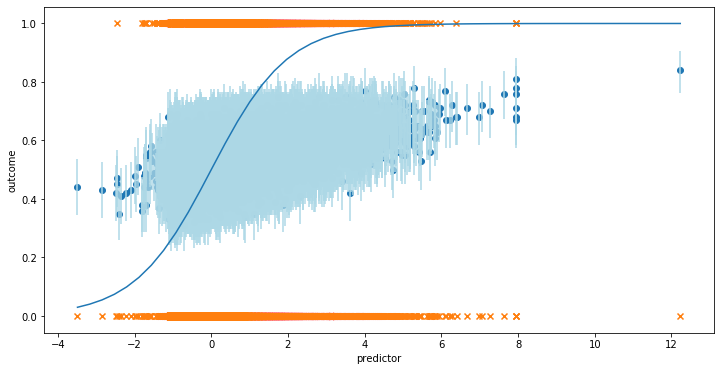

In [104]:
_, ax = plt.subplots(figsize=(12, 6))

b1 = st.beta((ppc1['y'] == 1).sum(axis=0), (ppc1['y'] == 0).sum(axis=0))

# estimated probability
ax.scatter(x=pca_xtest, y=b1.mean())

# error bars on the estimate
plt.vlines(pca_xtest, *b1.interval(0.95), colors="lightblue")

# actual outcomes
ax.scatter(x=pca_xtest,
           y=y_test, marker='x')

# True probabilities
x = np.linspace(pca_xtest.min(), pca_xtest.max())
ax.plot(x, invlogit(x), linestyle='-')


ax.set_xlabel('predictor')
ax.set_ylabel('outcome');

In [69]:
#naive bayes model
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict_proba(X_test)

In [70]:
#classication report after cross validating
cv_predicted = cross_val_predict(gnb, X_train, y_train, cv=10)
print (accuracy_score(y_train, cv_predicted))

print (classification_report(y_train, cv_predicted))

0.5363629544699592
              precision    recall  f1-score   support

           0       0.56      0.12      0.20     88912
           1       0.53      0.91      0.67     97734

    accuracy                           0.54    186646
   macro avg       0.55      0.52      0.44    186646
weighted avg       0.55      0.54      0.45    186646



In [71]:
#print AUC
y_pred = y_pred[:,1]
gnb_auc = roc_auc_score(y_test, y_pred)
print("AUC: %.2f%%" % (gnb_auc * 100.0))
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test, y_pred)

AUC: 56.82%


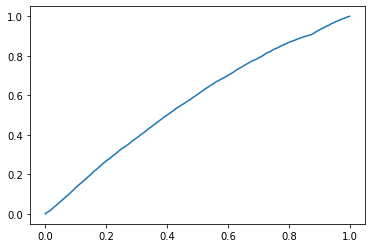

In [72]:
#ROC curve - not very accurate, almost random at 50/50
plt.plot(gnb_fpr,gnb_tpr)